# About The Dataset

Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections.

This data set includes 274 instances of countries, including their province/state, their location (latitude and longitude) and the dates.

Here is what the data(s) is being described:
- Province/State: The name of the region of the country, otherwise known as a territory. The name of states within the United States
- Country/Region: Name of each country/region
- Lat: The measurement of distance north or south of the Equator
- Long: The measurement east or west of the prime meridian
- Dates: Represents on the count of cases being recorded for each day
- county: The name of the area in a specific state
- state: The name of the States in the United States
- fips: FIPS codes of US states and counties
- cases: The number of people reported of having the virus
- deaths: The number of people reported that died from the virus


References:
- https://github.com/CSSEGISandData/COVID-19
- https://github.com/nytimes/covid-19-data

***

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from fbprophet import Prophet

***

# Importing Data

In [2]:
covid = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

print('This is the covid dataset:\n' + str(covid.head()) + '\n')
print('This is the county dataset:\n' + str(county.head()))

This is the covid dataset:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/21/21  2/22/21  2/23/21  \
0        0        0        0        0  ...    55604    55617    55646   
1        0        0        0        0  ...   100246   101285   102306   
2        0        0        0        0  ...   111917   112094   112279   
3        0        0        0        0  ...    10699    10712    10739   
4        0        0        0        0  ...    20519    20548    20584   

   2/24/21  2/25/21  2/26/21  2/27/21  2/28/21  3/1/21  3/2/21  
0    55664    55680    5

In [3]:
print('This dataset has ' + str(covid.shape[0]) + ' rows and ' + str(covid.shape[1]) + ' columns.')
print('This dataset has ' + str(county.shape[0]) + ' rows and ' + str(county.shape[1]) + ' columns.')

This dataset has 274 rows and 410 columns.
This dataset has 1082715 rows and 6 columns.


As we can see from above, there is about 408 columns to work with. Which is pretty neat if we wanted to display a visualization graph for a specific day during the pandemic, but I would prefer to have it in a long table than a wide table since it would be easier to see the data as a whole.

In [4]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,273.0,20.534804,2.519459e+01,-51.7963,5.152149,21.6940,41.1129,7.170690e+01
Long,273.0,23.028143,7.359617e+01,-178.1165,-19.020800,20.9394,84.2500,1.780650e+02
1/22/20,274.0,2.032847,2.687910e+01,0.0000,0.000000,0.0000,0.0000,4.440000e+02
1/23/20,274.0,2.390511,2.697708e+01,0.0000,0.000000,0.0000,0.0000,4.440000e+02
1/24/20,274.0,3.434307,3.358524e+01,0.0000,0.000000,0.0000,0.0000,5.490000e+02
...,...,...,...,...,...,...,...,...
2/26/21,274.0,413932.058394,2.019840e+06,0.0000,957.500000,12862.0000,170860.2500,2.846319e+07
2/27/21,274.0,415350.503650,2.025125e+06,0.0000,960.500000,12869.0000,171283.2500,2.852734e+07
2/28/21,274.0,416457.058394,2.029126e+06,0.0000,961.250000,12869.0000,171619.5000,2.857855e+07
3/1/21,274.0,417574.737226,2.033441e+06,0.0000,961.250000,12878.0000,171908.2500,2.863731e+07


In [5]:
county.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,1072769.0,31300.603830,16308.276495,1001.0,19005.0,29223.0,46102.0,78030.0
cases,1082715.0,3037.083570,16275.835491,0.0,57.0,382.0,1600.0,1194878.0
deaths,1059196.0,69.082057,502.441316,0.0,1.0,7.0,32.0,29473.0


***

# Preprocessing

### Data Reshaping

Since the main goal is to visualize the data as a whole we would prefer to have it in a long table. In order to do that, we would use the `df.melt()` function for us to get what we desire, which is to have it in a long table.

In [6]:
covid = covid.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
                   var_name = 'Date',
                   value_name = 'Cases')
covid.head(5)

,Province/State,Country/Region,Lat,Long,Date,Cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [7]:
covid.shape

(111244, 6)

Perfect! Now we have reduced the data set from 408 columns to 6 columns, as well with the rows where we went from 274 instances to more than 100,000 instances. Which is quite simple to handle and easier to work with for this analysis. Now let us proceed to inspecting the data types that we are working with for this data set.

In [8]:
print((covid.isnull().sum() / len(covid)) * 100)
print('\n' + str(county.isnull().sum() / len(county) * 100))

Province/State    68.978102
Country/Region     0.000000
Lat                0.364964
Long               0.364964
Date               0.000000
Cases              0.000000
dtype: float64

date      0.000000
county    0.000000
state     0.000000
fips      0.918617
cases     0.000000
deaths    2.172224
dtype: float64


This is great news, we do not have to worry about doing data imputation with this data set since we are mainly using three variables which are `Country/State`, `Date`, `Cases` and possibly `Province/State` if we wanted to filter for a specific province/state in a country. 

Same for the County data set, we don't have to worry about doing any data imputation.

In [9]:
print(str(covid.info()) + '\n')
print('\n' + str(county.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111244 entries, 0 to 111243
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  34510 non-null   object 
 1   Country/Region  111244 non-null  object 
 2   Lat             110838 non-null  float64
 3   Long            110838 non-null  float64
 4   Date            111244 non-null  object 
 5   Cases           111244 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 5.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082715 entries, 0 to 1082714
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   date    1082715 non-null  object 
 1   county  1082715 non-null  object 
 2   state   1082715 non-null  object 
 3   fips    1072769 non-null  float64
 4   cases   1082715 non-null  int64  
 5   deaths  1059196 non-null  float64
dtypes: float64(2), int64(1), 

As we can observe from the table above, most of its columns seem to have the correct data type, except for the `Date` column which is not much of an issue since we can easily change in the next section of the `Preprocessing` section.

### Drop unnecessary columns

In [10]:
covid = covid.drop(['Lat', 'Long'], axis = 1)

In [11]:
covid

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0
...,...,...,...,...
111239,NaN,Vietnam,3/2/21,2475
111240,NaN,West Bank and Gaza,3/2/21,187309
111241,NaN,Yemen,3/2/21,2342
111242,NaN,Zambia,3/2/21,79557


In [12]:
county = county.drop(['fips'], axis = 1)

In [13]:
county

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
1082710,2021-03-02,Sweetwater,Wyoming,3774,35.0
1082711,2021-03-02,Teton,Wyoming,3359,9.0
1082712,2021-03-02,Uinta,Wyoming,2062,12.0
1082713,2021-03-02,Washakie,Wyoming,884,26.0


### Converting from `str` to `datetime` data type

In [14]:
covid['Date'] = pd.to_datetime(covid['Date'])

In [15]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111244 entries, 0 to 111243
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  34510 non-null   object        
 1   Country/Region  111244 non-null  object        
 2   Date            111244 non-null  datetime64[ns]
 3   Cases           111244 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.4+ MB


In [16]:
county['date'] = pd.to_datetime(county['date'])

In [17]:
county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082715 entries, 0 to 1082714
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1082715 non-null  datetime64[ns]
 1   county  1082715 non-null  object        
 2   state   1082715 non-null  object        
 3   cases   1082715 non-null  int64         
 4   deaths  1059196 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 41.3+ MB


### Creating `Daily Cases` column

In [18]:
# Creating a new column where it gets the difference of cases for each day
covid['Daily Cases'] = (covid.groupby(by = ['Country/Region'])['Cases']
                        .diff()
                        .fillna(0)
                        .astype(dtype = np.int32))

In [19]:
# Checking if it correctly calculated the difference for each day
covid[covid['Country/Region'] == 'US'].head(5)

,Province/State,Country/Region,Date,Cases,Daily Cases
249,NaN,US,2020-01-22,1,0
523,NaN,US,2020-01-23,1,0
797,NaN,US,2020-01-24,2,1
1071,NaN,US,2020-01-25,2,0
1345,NaN,US,2020-01-26,5,3


In [20]:
# Creating a new column where it gets the difference of cases for each day
county['Daily Cases'] = (county.groupby(by = ['county', 'state'])['cases']
                        .diff()
                        .fillna(0)
                        .astype(dtype = np.int32))

### Creating `Daily Deaths` column

In [21]:
# Creating a new column where it gets the difference of death cases for each day
county['Daily Deaths'] = (county.groupby(by = ['county', 'state'])['deaths']
                        .diff()
                        .fillna(0)
                        .astype(dtype = np.int32))

### Creating `County State` column

In [22]:
# Concatenating two columns together 
county['County State'] = county['county'] + ', ' + county['state']
county[['County State']]

,County State
0,"Snohomish, Washington"
1,"Snohomish, Washington"
2,"Snohomish, Washington"
3,"Cook, Illinois"
4,"Snohomish, Washington"
...,...
1082710,"Sweetwater, Wyoming"
1082711,"Teton, Wyoming"
1082712,"Uinta, Wyoming"
1082713,"Washakie, Wyoming"


***

# Exploratory Data Analysis

Now I am quite satisfied with the data and it is ready to be visualized. Even though, I will be creating some basic plots it is still worth trying to see what interesting findings I could find within the graphs. There is a few things that I would like to know such as: 
- Time Series of Daily Cases in the United States
- Time Series of Daily Cases/Deaths in Harris County, Texas
- The Top 10 Number of Cases/Deaths of Counties in Texas
- The Top 10 Number of Cases/Deaths of States in the United States
- Daily Death Rate Per Day in Texas
- Forcasting the Future for the United States and Harris County, Texas

### Time Series of Daily Cases in the United States

Even though we have more than 100,000 instances within the `covid` dataset I would like to specifically *only* look at the United States. So, first, I will narrow down the data set where it is quite feasible to work with. Luckily, since we have the `Daily Cases` this would be perfect for our time series where it would display on how many cases appeared on a specific day in the graph. If we did not do just that we would have obtained a cumulative sum of the cases for the United States which is something that we are not looking for. But, unfortunately the `covid` data set did not have any data about the deaths for each country. So, please bear with me. 

Interestingly enough, as we were about to enter into a new year we have quadrapuled our cases! Which is crazy! We could assume this was the time where people were quite depraved of social interaction and wanting to go visit friends and/or family during the holidays despite the consequences leading to numbers displayed in the graph.

In [23]:
# Filtering only for the US and removing an unnecessary column
us_covid = (covid[(covid['Country/Region'] == 'US')]
            .reset_index(drop = True)
            .drop(['Province/State'], axis = 1))
us_covid.head()

,Country/Region,Date,Cases,Daily Cases
0,US,2020-01-22,1,0
1,US,2020-01-23,1,0
2,US,2020-01-24,2,1
3,US,2020-01-25,2,0
4,US,2020-01-26,5,3


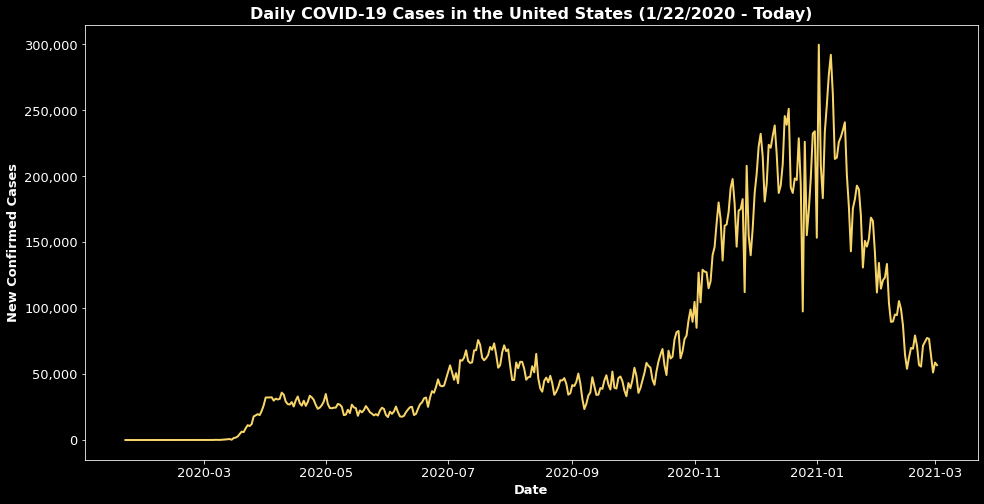

In [24]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize= (16, 8))

plt.plot(us_covid['Date'],
         us_covid['Daily Cases'],
         color = '#f8d568',
         linestyle = 'solid',
         linewidth = 2)

plt.xticks(fontsize = 13, color = 'white')
plt.xlabel(xlabel = 'Date', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'New Confirmed Cases', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Daily COVID-19 Cases in the United States (1/22/2020 - Today)',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

### Time Series of Daily Cases/Deaths in Harris County, Texas

As I said from the previous section, I am going to be focusing on a specific county and state within the `county` data set and those are Harris County and Texas. Which again I would have to subset the data of 1,079,469 instances and narrow it down to a small dataframe.

Beautiful! Now, we have the time series of daily cases for Harris County, Texas. Few months ago, specifically around mid-September, I remember the news was talking about putting the state thru another lockdown due to the high number of cases increasing which seems about right looking at the graph.

In [25]:
# Filtering for the Harris County in the state of Texas
harris_county = county[(county['county'] == 'Harris') & (county['state'] == 'Texas')]
harris_county

,date,county,state,cases,deaths,Daily Cases,Daily Deaths,County State
573,2020-03-05,Harris,Texas,4,0.0,0,0,"Harris, Texas"
642,2020-03-06,Harris,Texas,5,0.0,1,0,"Harris, Texas"
734,2020-03-07,Harris,Texas,5,0.0,0,0,"Harris, Texas"
846,2020-03-08,Harris,Texas,6,0.0,1,0,"Harris, Texas"
976,2020-03-09,Harris,Texas,6,0.0,0,0,"Harris, Texas"
...,...,...,...,...,...,...,...,...
1069208,2021-02-26,Harris,Texas,348125,5019.0,3227,39,"Harris, Texas"
1072454,2021-02-27,Harris,Texas,348848,5041.0,723,22,"Harris, Texas"
1075700,2021-02-28,Harris,Texas,350201,5075.0,1353,34,"Harris, Texas"
1078945,2021-03-01,Harris,Texas,351063,5082.0,862,7,"Harris, Texas"


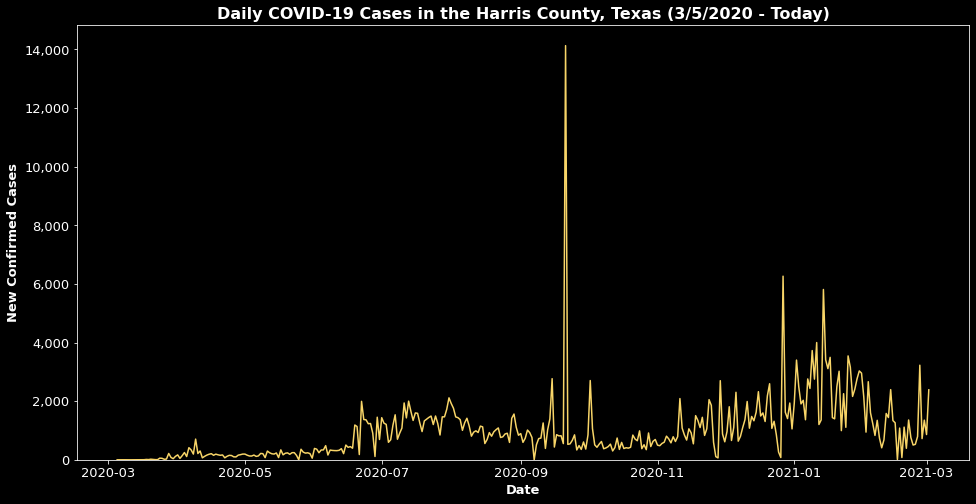

In [26]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize= (16, 8))

plt.plot(harris_county['date'],
         harris_county['Daily Cases'],
         color = '#f8d568',
         linestyle = 'solid')

plt.xticks(fontsize = 13)
plt.xlabel(xlabel = 'Date', fontsize = 13, fontweight = 'bold')

plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'New Confirmed Cases', fontsize = 13, fontweight = 'bold')
plt.ylim(0)

plt.title(label = 'Daily COVID-19 Cases in the Harris County, Texas (3/5/2020 - Today)',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

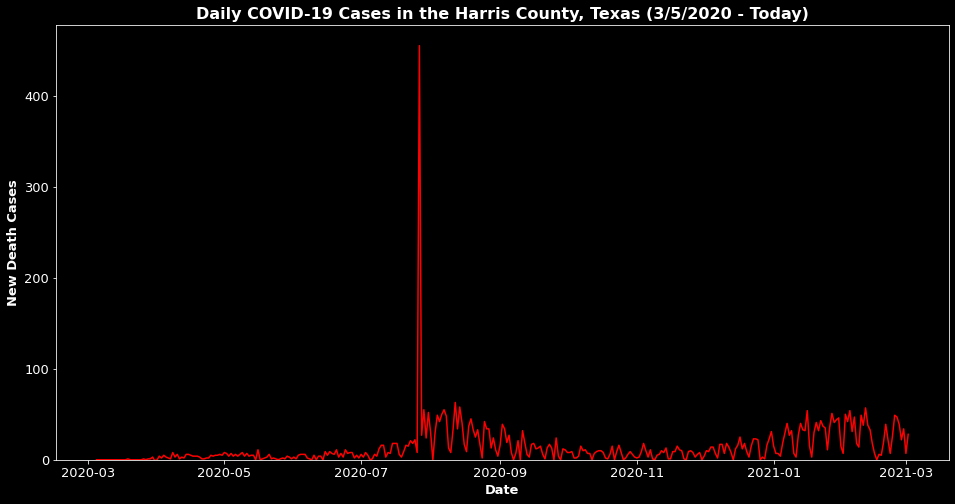

In [27]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize= (16, 8))

plt.plot(harris_county['date'],
         harris_county['Daily Deaths'],
         color = 'red',
         linestyle = 'solid')

plt.xticks(fontsize = 13)
plt.xlabel(xlabel = 'Date', fontsize = 13, fontweight = 'bold')

plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'New Death Cases', fontsize = 13, fontweight = 'bold')
plt.ylim(0)



plt.title(label = 'Daily COVID-19 Cases in the Harris County, Texas (3/5/2020 - Today)',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

### Time Series of Daily Cases/Deaths in Harris County, Texas

In [28]:
texas = (county[(county['state'] == 'Texas')]
         .groupby(by = ['date'], as_index = False)
         .sum())
texas.head()

,date,cases,deaths,Daily Cases,Daily Deaths
0,2020-02-12,1,0.0,0,0
1,2020-02-13,2,0.0,1,0
2,2020-02-14,2,0.0,0,0
3,2020-02-15,2,0.0,0,0
4,2020-02-16,2,0.0,0,0


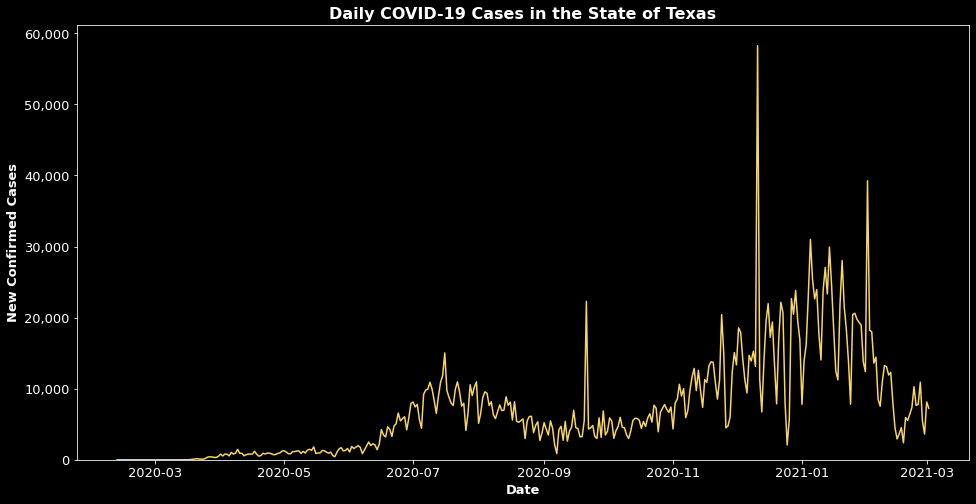

In [29]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize= (16, 8))

plt.plot(texas['date'],
         texas['Daily Cases'],
         color = '#f8d568',
         linestyle = 'solid')

plt.xticks(fontsize = 13)
plt.xlabel(xlabel = 'Date', fontsize = 13, fontweight = 'bold')

plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'New Confirmed Cases', fontsize = 13, fontweight = 'bold')
plt.ylim(0)



plt.title(label = 'Daily COVID-19 Cases in the State of Texas',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

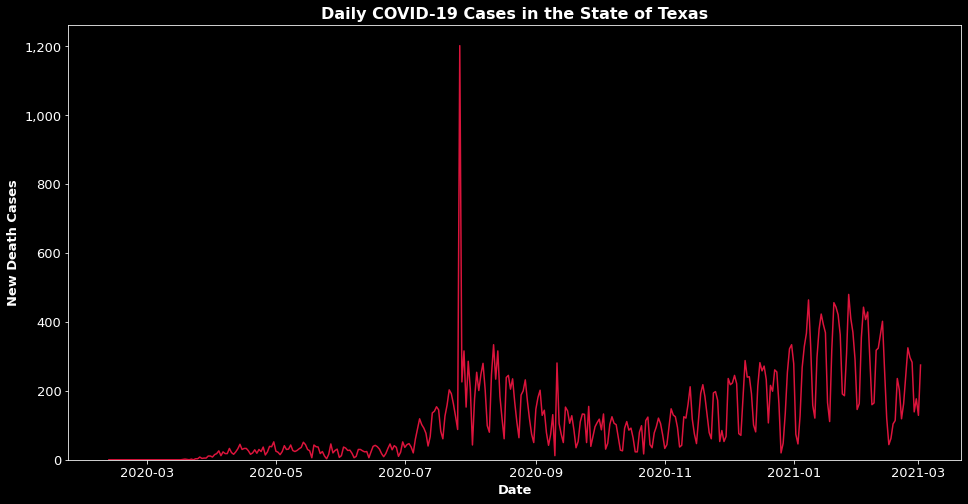

In [30]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize= (16, 8))

plt.plot(texas['date'],
         texas['Daily Deaths'],
         color = 'crimson',
         linestyle = 'solid')

plt.xticks(fontsize = 13)
plt.xlabel(xlabel = 'Date', fontsize = 13, fontweight = 'bold')

plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'New Death Cases', fontsize = 13, fontweight = 'bold')
plt.ylim(0)



plt.title(label = 'Daily COVID-19 Cases in the State of Texas',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

### The Top 10 Number of Cases/Deaths of Counties in Texas

In [31]:
# Creating a dataframe where it displays the total number of cases (in this case, the max) for each county
# in the state of Texas
top_tx_counties = (county[(county['state'] == 'Texas')]
                   .groupby(by = ['county'], as_index = False)
                   .agg({'cases': ['max']})
                   .nlargest(10, columns = [('cases', 'max')])
                   .reset_index(drop = True))
top_tx_counties

,county,cases
,,max
0,Harris,353450
1,Dallas,281681
2,Tarrant,243067
3,Bexar,197077
4,El Paso,124162
5,Collin,83404
6,Hidalgo,77702
7,Travis,76088
8,Denton,65171


In [32]:
# Creating a dataframe where it displays the total number of deaths (in this case, the max) for each county
# in the state of Texas
top_tx_counties_deaths = (county[(county['state'] == 'Texas')]
                          .groupby(by = ['county'], as_index = False)
                          .agg({'deaths': ['max']})
                          .nlargest(10, columns = [('deaths', 'max')])
                          .reset_index(drop = True))
top_tx_counties_deaths

,county,deaths
,,max
0,Harris,5110.0
1,Dallas,3453.0
2,Bexar,2931.0
3,Tarrant,2897.0
4,Hidalgo,2645.0
5,El Paso,2360.0
6,Cameron,1480.0
7,Travis,855.0
8,Webb,788.0


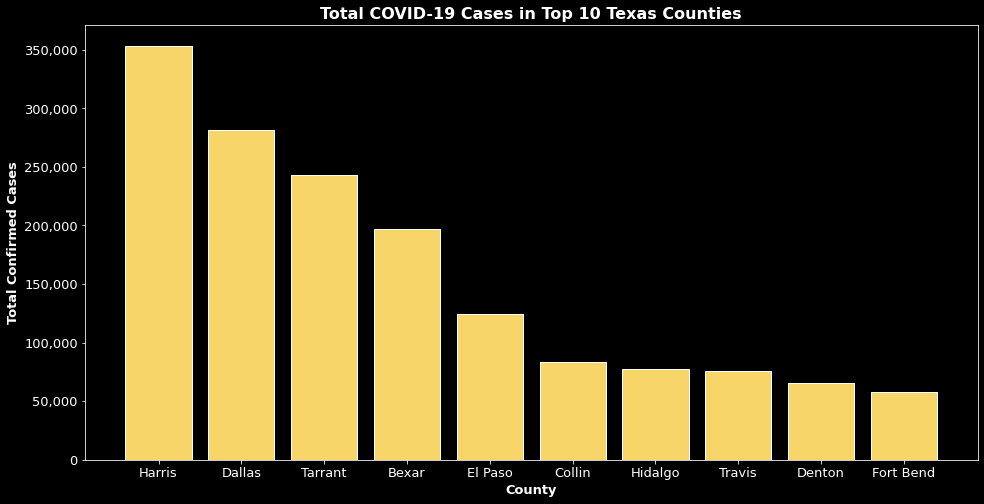

In [33]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(top_tx_counties[('county', '')],
        top_tx_counties[('cases', 'max')],
        color = '#f8d568',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white')
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Cases', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Total COVID-19 Cases in Top 10 Texas Counties',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

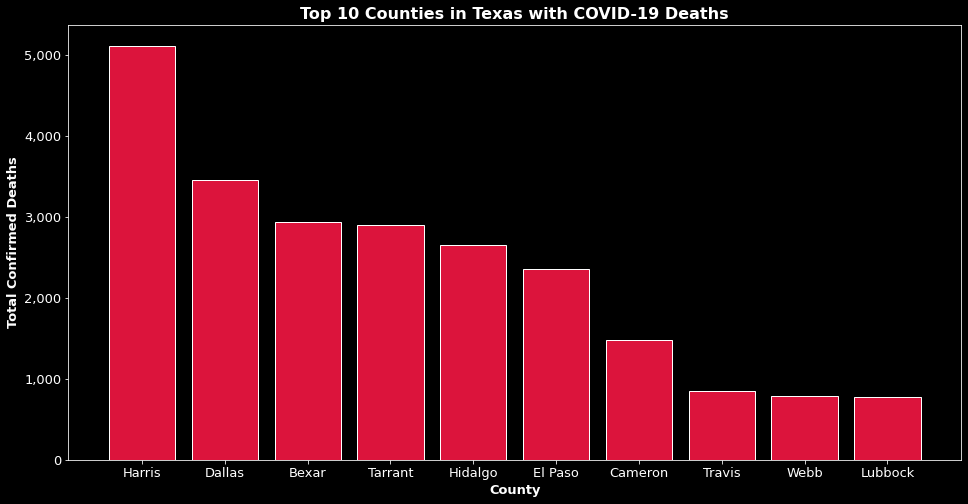

In [34]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(top_tx_counties_deaths[('county', '')],
        top_tx_counties_deaths[('deaths', 'max')],
        color = 'crimson',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white')
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 Counties in Texas with COVID-19 Deaths',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

### The Top 10 Number of Cases/Deaths of County, States in the United States

In [35]:
top_states_cases = (county.groupby(by = ['County State'], as_index = False)
                   .agg({'cases': ['max']})
                   .nlargest(10, columns = [('cases', 'max')])
                   .reset_index(drop = True))
top_states_cases

,County State,cases
,,max
0,"Los Angeles, California",1194878
1,"New York City, New York",732557
2,"Maricopa, Arizona",511806
3,"Cook, Illinois",475386
4,"Miami-Dade, Florida",412907
5,"Harris, Texas",353450
6,"Riverside, California",290325
7,"San Bernardino, California",286814
8,"Dallas, Texas",281681


In [36]:
top_states_deaths = (county.groupby(by = ['County State'], as_index = False)
                    .agg({'deaths': ['max']})
                    .nlargest(10, columns = [('deaths', 'max')])
                    .reset_index(drop = True))
top_states_deaths

,County State,deaths
,,max
0,"New York City, New York",29473.0
1,"Los Angeles, California",21554.0
2,"Cook, Illinois",9955.0
3,"Maricopa, Arizona",9157.0
4,"Miami-Dade, Florida",5481.0
5,"Harris, Texas",5110.0
6,"Wayne, Michigan",4149.0
7,"Orange, California",3952.0
8,"Clark, Nevada",3871.0


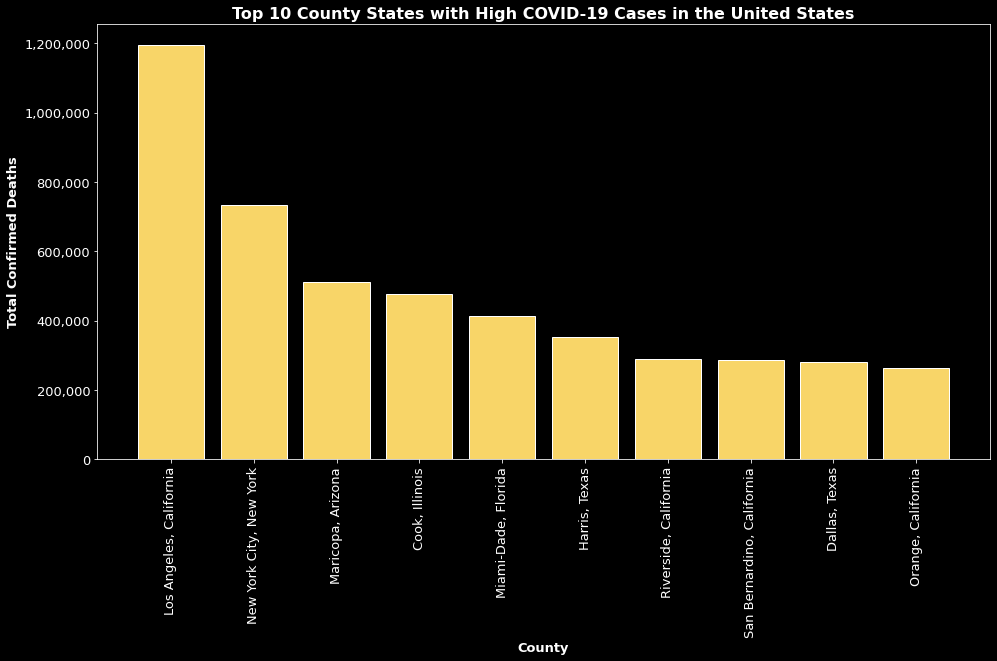

In [37]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(top_states_cases[('County State', '')],
        top_states_cases[('cases', 'max')],
        color = '#f8d568',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white', rotation = 90)
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 County States with High COVID-19 Cases in the United States',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

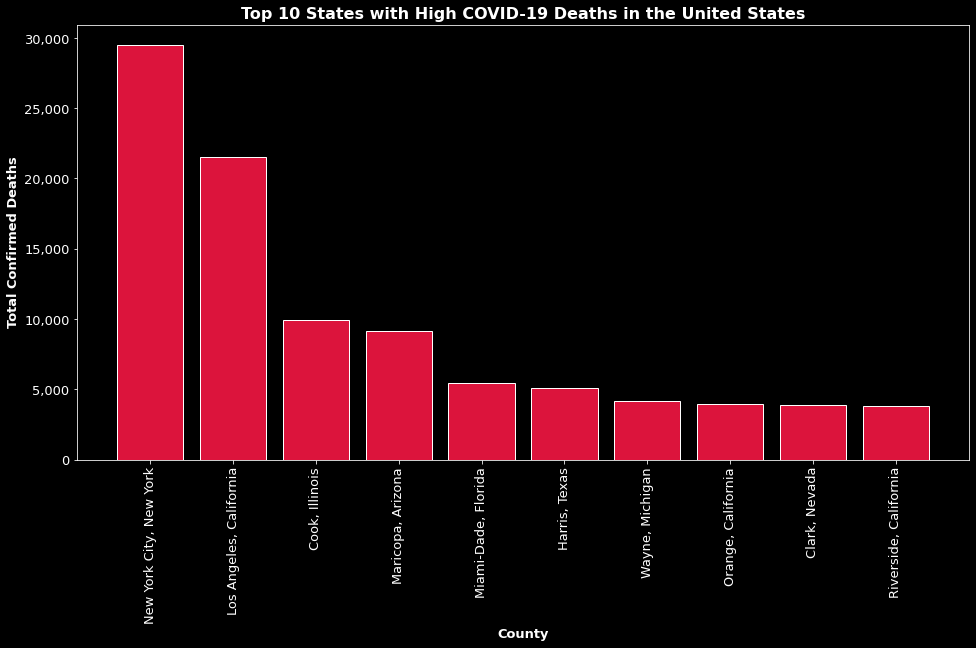

In [38]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(top_states_deaths[('County State', '')],
        top_states_deaths[('deaths', 'max')],
        color = 'crimson',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white', rotation = 90)
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 States with High COVID-19 Deaths in the United States',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

### The Top 10 Number of Cases/Deaths of States in the United States

In [39]:
states_cases = (county
                .groupby(by = ['state'], as_index = False)
                .sum()
                .nlargest(10, columns = ['Daily Cases', 'Daily Deaths'])
                .reset_index(drop = True)
                .drop(['cases', 'deaths'], axis = 1))

In [40]:
states_cases.columns = ['State', 'Total Cases', 'Total Deaths']
states_cases['Death/Cases ratio (%)'] = round((states_cases['Total Deaths']/states_cases['Total Cases']) * 100, 3)
states_cases

,State,Total Cases,Total Deaths,Death/Cases ratio (%)
0,California,3577423,52775,1.475
1,Texas,2668332,44352,1.662
2,Florida,1918012,31133,1.623
3,New York,1656858,48447,2.924
4,Illinois,1192673,22803,1.912
5,Georgia,986742,16933,1.716
6,Ohio,970475,16749,1.726
7,Pennsylvania,940743,24134,2.565
8,North Carolina,867726,11320,1.305
9,Arizona,819281,16062,1.960


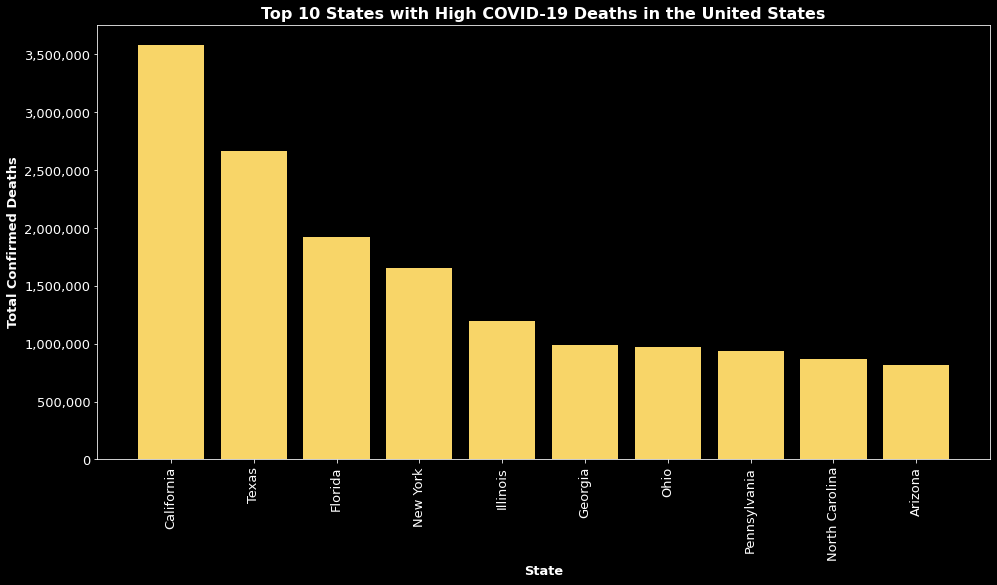

In [41]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (16, 8))

ax.bar(states_cases['State'],
       states_cases['Total Cases'],
       color = '#f8d568')

plt.xticks(fontsize = 13, color = 'white', rotation = 90)
plt.xlabel(xlabel = 'State', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 States with High COVID-19 Deaths in the United States',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

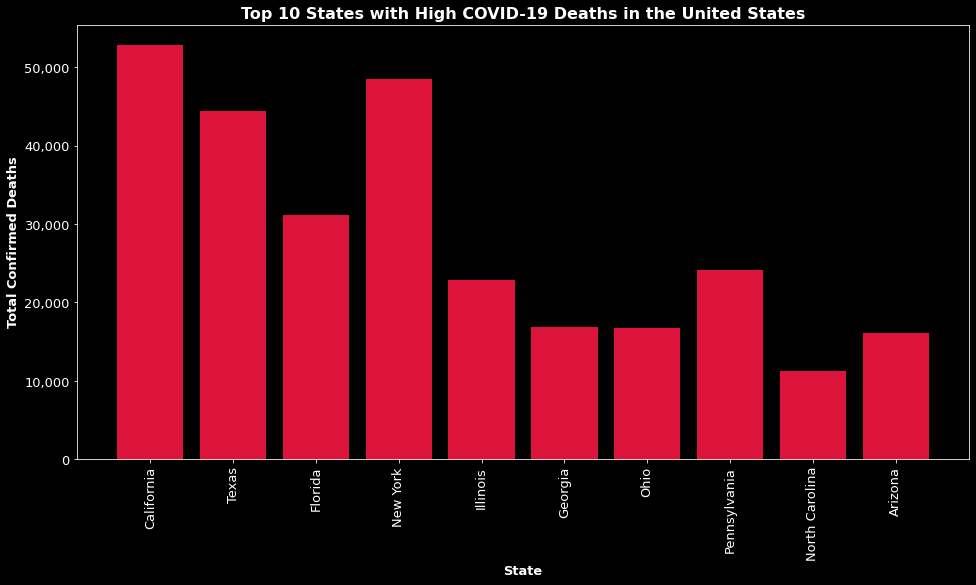

In [42]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.bar(states_cases['State'],
       states_cases['Total Deaths'],
       color = 'crimson')

plt.xticks(fontsize = 13, color = 'white', rotation = 90)
plt.xlabel(xlabel = 'State', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 States with High COVID-19 Deaths in the United States',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

### Daily Death Rate Per Day in Texas

In [106]:
tx_cases = (county
             .groupby(by = ['state', 'date'], as_index = False)
             .sum()
             .reset_index(drop = True)
             .drop(['cases', 'deaths'], axis = 1))

tx_cases = tx_cases[(tx_cases['state'] == 'Texas')].reset_index(drop = True)
tx_cases['Death/Cases Ratio (%)'] = round((tx_cases['Daily Deaths']/tx_cases['Daily Cases'])*100, 3).fillna(0)
tx_cases

,state,date,Daily Cases,Daily Deaths,Death/Cases Ratio (%)
0,Texas,2020-02-12,0,0,0.000
1,Texas,2020-02-13,1,0,0.000
2,Texas,2020-02-14,0,0,0.000
3,Texas,2020-02-15,0,0,0.000
4,Texas,2020-02-16,0,0,0.000
...,...,...,...,...,...
380,Texas,2021-02-26,10911,283,2.594
381,Texas,2021-02-27,5443,139,2.554
382,Texas,2021-02-28,3621,177,4.888
383,Texas,2021-03-01,8140,129,1.585


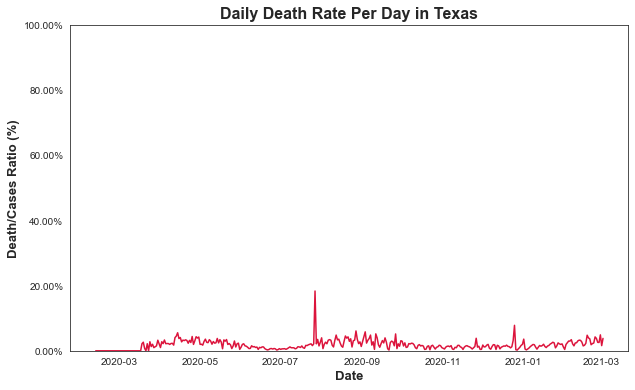

In [107]:
fig, ax = plt.subplots(figsize= (10, 6))

plt.plot(tx_cases['date'],
         tx_cases['Death/Cases Ratio (%)'],
         color = 'crimson')

plt.ylim((0, 100))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.2f}%'))
plt.xlabel('Date', fontsize = 13, fontweight = 'bold')
plt.ylabel('Death/Cases Ratio (%)', fontsize = 13, fontweight = 'bold')
plt.title('Daily Death Rate Per Day in Texas', fontsize = 16, fontweight = 'bold')
plt.show()

### Forcasting the Future for the United States

Prophet is an open source time series forecasting algorithm designed by Facebook for ease of use without any expert knowledge in statistics or time series forecasting. With the FBProphet library I am going to predict the future within the United States and as well in Harris County, but be warned that these predictions would not be '100%' accurate since it could possibly be slightly off from the actual prediction than if you were to use ARIMA to do some forcasting. 

In [89]:
us_covid

,Country/Region,Date,Cases,Daily Cases
0,US,2020-01-22,1,0
1,US,2020-01-23,1,0
2,US,2020-01-24,2,1
3,US,2020-01-25,2,0
4,US,2020-01-26,5,3
...,...,...,...,...
401,US,2021-02-26,28463190,76698
402,US,2021-02-27,28527344,64154
403,US,2021-02-28,28578548,51204
404,US,2021-03-01,28637313,58765


In [43]:
# Creating a copy of the dataset
us_covid_2 = us_covid.copy()

In [44]:
# Dropping the unnecessary columns since Prophet only requires the dates and values
us_covid_2 = us_covid_2.drop(['Country/Region', 'Cases'], axis = 1)

In [45]:
# Renaming columns to 'ds' and 'y' since those columns are required to have it named like that
# If not, it won't produce a graph
us_covid_2.columns = ['ds', 'y']

In [46]:
us_covid_2

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,1
3,2020-01-25,0
4,2020-01-26,3
...,...,...
401,2021-02-26,76698
402,2021-02-27,64154
403,2021-02-28,51204
404,2021-03-01,58765


In [47]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(us_covid_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [48]:
# Creating a dataframe where we are going to predict the next 100 days for new cases values
future = m.make_future_dataframe(periods = 100, freq = 'D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-247.038542,-46339.611751,47510.804382,-247.038542,-247.038542,1972.182050,1972.182050,1972.182050,-1027.660243,-1027.660243,-1027.660243,2999.842293,2999.842293,2999.842293,0.0,0.0,0.0,1725.143508
1,2020-01-23,-13.773702,-39344.208678,51577.412639,-13.773702,-13.773702,4626.161500,4626.161500,4626.161500,-1027.660243,-1027.660243,-1027.660243,5653.821743,5653.821743,5653.821743,0.0,0.0,0.0,4612.387797
2,2020-01-24,219.491137,-41939.731666,56800.900217,219.491137,219.491137,5987.428017,5987.428017,5987.428017,-1027.660243,-1027.660243,-1027.660243,7015.088260,7015.088260,7015.088260,0.0,0.0,0.0,6206.919154
3,2020-01-25,452.755977,-42674.565464,46090.595608,452.755977,452.755977,1523.958458,1523.958458,1523.958458,-1027.660243,-1027.660243,-1027.660243,2551.618701,2551.618701,2551.618701,0.0,0.0,0.0,1976.714434
4,2020-01-26,686.020816,-58176.834170,36004.951176,686.020816,686.020816,-10592.928413,-10592.928413,-10592.928413,-1027.660243,-1027.660243,-1027.660243,-9565.268169,-9565.268169,-9565.268169,0.0,0.0,0.0,-9906.907597


In [49]:
# Displays the new dates and new values in the next 100 days
forecast[['ds', 'yhat']]

,ds,yhat
0,2020-01-22,1725.143508
1,2020-01-23,4612.387797
2,2020-01-24,6206.919154
3,2020-01-25,1976.714434
4,2020-01-26,-9906.907597
...,...,...
501,2021-06-06,-48169.537701
502,2021-06-07,-47486.529833
503,2021-06-08,-42519.938384
504,2021-06-09,-39747.253564


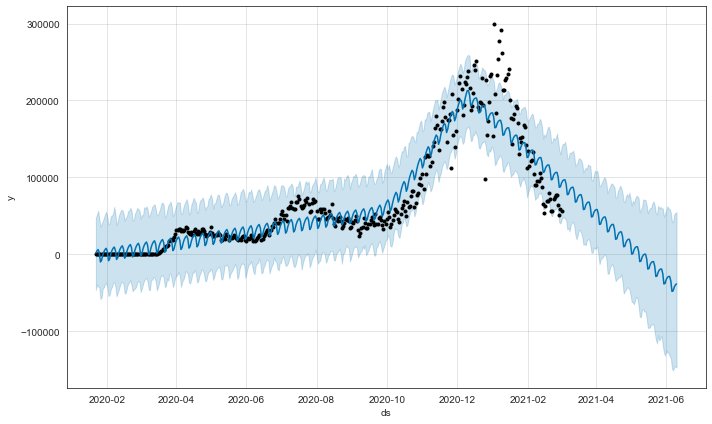

In [50]:
sns.set_style('white')
plot1 = m.plot(forecast)

Interestingly enough, there will be a down trend when it comes to the number of cases in the next 100 days! So be ready to hang out with friends soon but hold on. As I mentioned before, these predictions do not mean this will happen just like that displayed from the graph anything could happen within the next 100 days. I heard from the news that Texas Governor will stop the Mandatory Mask mandate to fully "open" the state once again so it could either mean that we will be seeing a up trend soon or be continue seeing a down trend in the future, which I kind of doubt it. But it is still good to be optimistic about it.

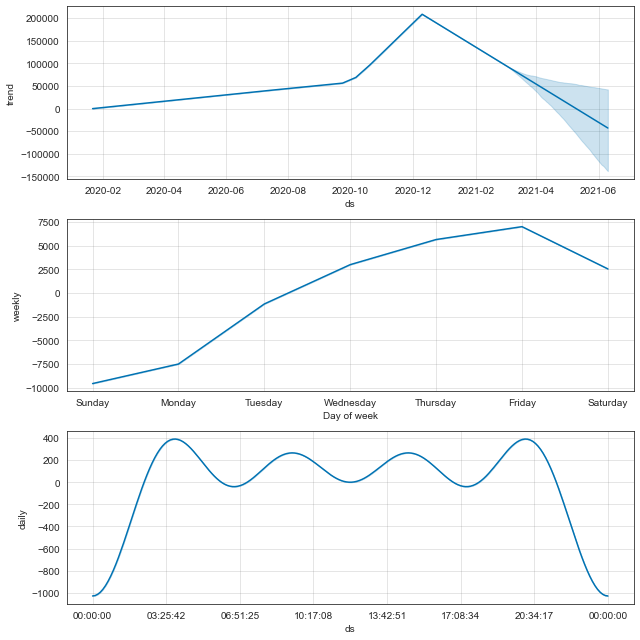

In [51]:
plot2 = m.plot_components(forecast)

What we see here is the trends that happened over the course of the year, week, and daily. But we are not going to be focusing on the daily graph since its sort of nonsense to look at. 

For the Year (or otherwise the Trend) graph we see that theres an up-trend happening which is accurate if care to look at the Time Series Graph on the United States where we see a heap of cases towards the end of the year. According to the prediction it shows that the next 100 days there will be down trend which may or may not happen.

Ironically enough, for the Weekly graph I would expect that there would be an up-trend when the weekend approaches, but it was the other way around. Which makes sense since people live their regular lives going to work, and do sorts of activities and still have to be around other people where they have a risk of contracting the virus.

### Forcasting the Future for Harris County

In [92]:
harris_county

,date,county,state,cases,deaths,Daily Cases,Daily Deaths,County State
573,2020-03-05,Harris,Texas,4,0.0,0,0,"Harris, Texas"
642,2020-03-06,Harris,Texas,5,0.0,1,0,"Harris, Texas"
734,2020-03-07,Harris,Texas,5,0.0,0,0,"Harris, Texas"
846,2020-03-08,Harris,Texas,6,0.0,1,0,"Harris, Texas"
976,2020-03-09,Harris,Texas,6,0.0,0,0,"Harris, Texas"
...,...,...,...,...,...,...,...,...
1069208,2021-02-26,Harris,Texas,348125,5019.0,3227,39,"Harris, Texas"
1072454,2021-02-27,Harris,Texas,348848,5041.0,723,22,"Harris, Texas"
1075700,2021-02-28,Harris,Texas,350201,5075.0,1353,34,"Harris, Texas"
1078945,2021-03-01,Harris,Texas,351063,5082.0,862,7,"Harris, Texas"


In [93]:
harris_county_2 = harris_county.copy()

In [94]:
harris_county_2 = harris_county_2.drop(['county', 'state', 'cases', 'deaths', 'County State', 'Daily Deaths'], axis =1)

In [95]:
harris_county_2.columns = ['ds', 'y']

In [96]:
m_2 = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m_2.fit(harris_county_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [100]:
future_2 = m_2.make_future_dataframe(periods = 100, freq = 'D')
forecast_2 = m_2.predict(future_2)
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-05,-4.174475,-1858.558825,1901.742628,-4.174475,-4.174475,-35.406732,-35.406732,-35.406732,-16.699965,-16.699965,-16.699965,-18.706766,-18.706766,-18.706766,0.0,0.0,0.0,-39.581206
1,2020-03-06,2.107014,-1886.513711,1944.405343,2.107014,2.107014,12.356810,12.356810,12.356810,-16.699965,-16.699965,-16.699965,29.056776,29.056776,29.056776,0.0,0.0,0.0,14.463824
2,2020-03-07,8.388503,-1890.659721,1806.270859,8.388503,8.388503,-34.431816,-34.431816,-34.431816,-16.699965,-16.699965,-16.699965,-17.731851,-17.731851,-17.731851,0.0,0.0,0.0,-26.043314
3,2020-03-08,14.669991,-1829.600669,1926.376314,14.669991,14.669991,18.271248,18.271248,18.271248,-16.699965,-16.699965,-16.699965,34.971213,34.971213,34.971213,0.0,0.0,0.0,32.941239
4,2020-03-09,20.951480,-1886.407487,1992.941228,20.951480,20.951480,162.708082,162.708082,162.708082,-16.699965,-16.699965,-16.699965,179.408047,179.408047,179.408047,0.0,0.0,0.0,183.659562


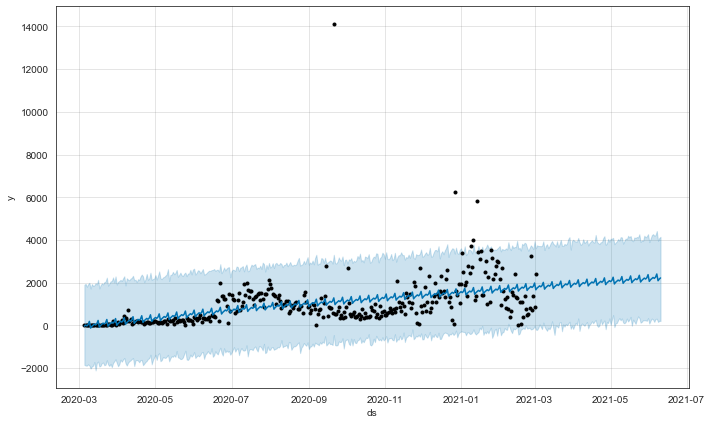

In [104]:
plot3 = m_2.plot(forecast_2)

Oh yikes, this is not looking good for Harris County, there's a slight up-trend going on here on this graph yet the confindence bands are too large where this prediction might not be quite accurate whatsoever.

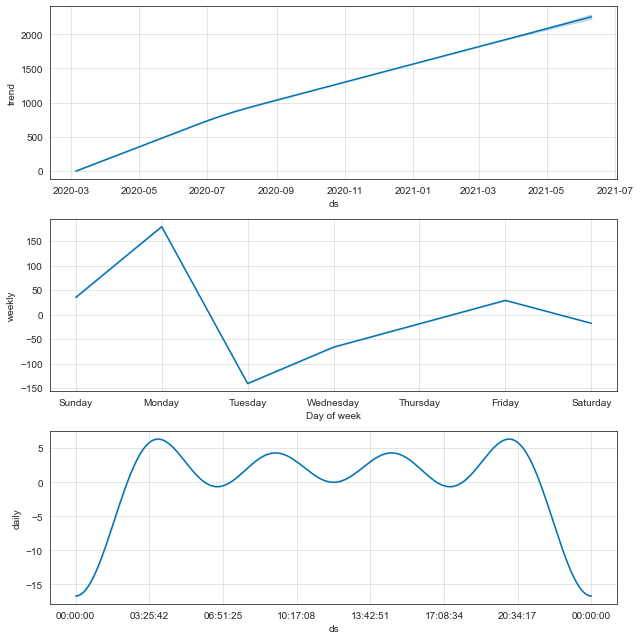

In [103]:
plot4 = m_2.plot_components(forecast_2)

Even though these predictions are for Harris County could possibly be way off, these graphs are quite interesting to look at. In the Trend graph we just an up-trend happening where there could be more cases in the next 100 days in Harris County, Texas. 